In [ ]:
import plotly.express as px 
import pandas as pd 
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd


mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

print("Import Succesfull")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Import Succesfull


In [ ]:
# Get some data
df = pd.read_excel("/content/drive/My Drive/Capstone_Commodity_SureshaHP/Tomato/Tomato_Clean31Aug2020.xlsx")

In [ ]:
df.head(10)

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,BHOPAL_WholesalePrice,BHOPAL_RetailPrice,BHOPAL_Volume,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,CHENNAI_WholesalePrice,CHENNAI_RetailPrice,CHENNAI_Volume,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,DieselPrice,Date
0,1194.0,3125.0,3658.0,1295.0,1961.0,30762.0,1527.0,1919.0,3055.0,1513.0,3285.0,15850.0,1506.0,2132.0,1917.0,979.000000,1529.000000,2370.000000,1701.0,3123.0,4638.0,1739.0,2604.0,3510.0,2188.0,3442.0,11217.0,2207,2867.0,2843.0,53.74,2015-01-01
1,1198.0,3205.0,3318.0,829.0,1392.0,11995.0,1161.0,1473.0,2955.0,1515.0,3135.0,15178.0,1256.0,1846.0,1810.0,1679.916667,3444.533333,9520.883333,1822.0,3404.0,4228.0,1479.0,2128.0,2011.0,1965.0,2826.0,10714.0,1465,1965.0,3163.0,51.96,2015-02-01
2,880.0,2600.0,2820.0,776.0,1296.0,13511.0,1184.0,1523.0,1684.0,1435.0,2913.0,14104.0,1016.0,1568.0,1880.0,1679.916667,3444.533333,9520.883333,1887.0,3538.0,421.0,1353.0,2085.0,1163.0,1622.0,2761.0,10826.0,1350,1980.0,3285.0,55.41,2015-03-01
3,895.0,2477.0,3652.0,995.0,1640.0,8964.0,670.0,850.0,3065.0,1529.0,3283.0,13692.0,1491.0,2174.0,1625.0,1679.916667,3444.533333,9520.883333,1620.0,2683.0,351.0,1442.0,2364.0,1285.0,1425.0,2563.0,8407.0,1178,1655.0,3040.0,52.56,2015-04-01
4,1231.0,3190.0,6883.0,2115.0,2888.0,11665.0,1367.0,2535.0,2389.0,1649.0,3772.0,9535.0,2385.0,3331.0,1760.0,1285.000000,1962.000000,1774.000000,2717.0,3517.0,206.0,2100.0,3081.0,851.0,1322.0,2680.0,8108.0,1153,1795.0,2793.0,58.19,2015-05-01
5,1402.0,3182.0,7446.0,1318.0,2095.0,11969.0,1374.0,1752.0,2430.0,1454.0,3212.0,9012.0,1731.0,2673.0,1841.0,1500.000000,2500.000000,278.000000,2211.0,2883.0,159.0,2449.0,4138.0,2670.0,1533.0,3000.0,6071.0,1309,1877.0,1839.0,56.69,2015-06-01
6,1904.0,3771.0,8094.0,1748.0,2505.0,10460.0,2072.0,2528.0,2077.0,1930.0,4012.0,10521.0,2042.0,3067.0,2287.0,1500.000000,2500.000000,556.000000,1763.0,2545.0,498.0,2949.0,4827.0,2247.0,1650.0,2923.0,8120.0,1589,2287.0,1567.0,53.37,2015-07-01
7,1114.0,3071.0,8125.0,631.0,1204.0,13605.0,1756.0,2126.0,2193.0,1607.0,3420.0,11442.0,1138.0,1792.0,2890.0,1679.916667,3444.533333,9520.883333,1830.0,2822.0,177.0,2113.0,3500.0,2700.0,986.0,2380.0,7877.0,915,1298.0,1456.0,48.23,2015-08-01
8,1124.0,3071.0,8440.0,705.0,1318.0,12390.0,1626.0,1917.0,2699.0,2020.0,3504.0,11020.0,1246.0,2017.0,2520.0,1679.916667,3444.533333,9520.883333,1800.0,2791.0,598.0,2374.0,3774.0,2206.0,2098.0,4167.0,8410.0,962,1395.0,1329.0,47.70,2015-09-01
9,1360.0,3146.0,5635.0,1464.0,2205.0,13393.0,1697.0,2094.0,2964.0,2113.0,4113.0,11618.0,2439.0,3513.0,1880.0,1200.000000,1800.000000,460.000000,2229.0,3357.0,864.0,4113.0,6371.0,1998.0,1514.0,3048.0,7498.0,1250,1705.0,1030.0,49.26,2015-10-01


In [ ]:
columns=['Date','DELHI_WholesalePrice','DELHI_RetailPrice','DELHI_Volume','DieselPrice']
Del = df[columns]

In [ ]:
Del.head()

,Date,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,DieselPrice
0,2015-01-01,1513.0,3285.0,15850.0,53.74
1,2015-02-01,1515.0,3135.0,15178.0,51.96
2,2015-03-01,1435.0,2913.0,14104.0,55.41
3,2015-04-01,1529.0,3283.0,13692.0,52.56
4,2015-05-01,1649.0,3772.0,9535.0,58.19


In [ ]:
Del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  67 non-null     datetime64[ns]
 1   DELHI_WholesalePrice  67 non-null     float64       
 2   DELHI_RetailPrice     67 non-null     float64       
 3   DELHI_Volume          67 non-null     float64       
 4   DieselPrice           67 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.7 KB


In [ ]:
Del.describe(include='all')

,Date,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,DieselPrice
count,67,67.000000,67.000000,67.000000,67.000000
unique,67,NaN,NaN,NaN,NaN
top,2016-05-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2020-07-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,1656.761905,3481.190476,11882.682540,61.314545
std,NaN,823.940030,1240.773706,2195.506312,7.724340
min,NaN,433.000000,1593.000000,6101.000000,47.700000
25%,NaN,1070.000000,2700.000000,10668.000000,55.330000


# EXPLORATORY DATA ANALYSIS

In [ ]:
print(Del.shape)

(67, 5)


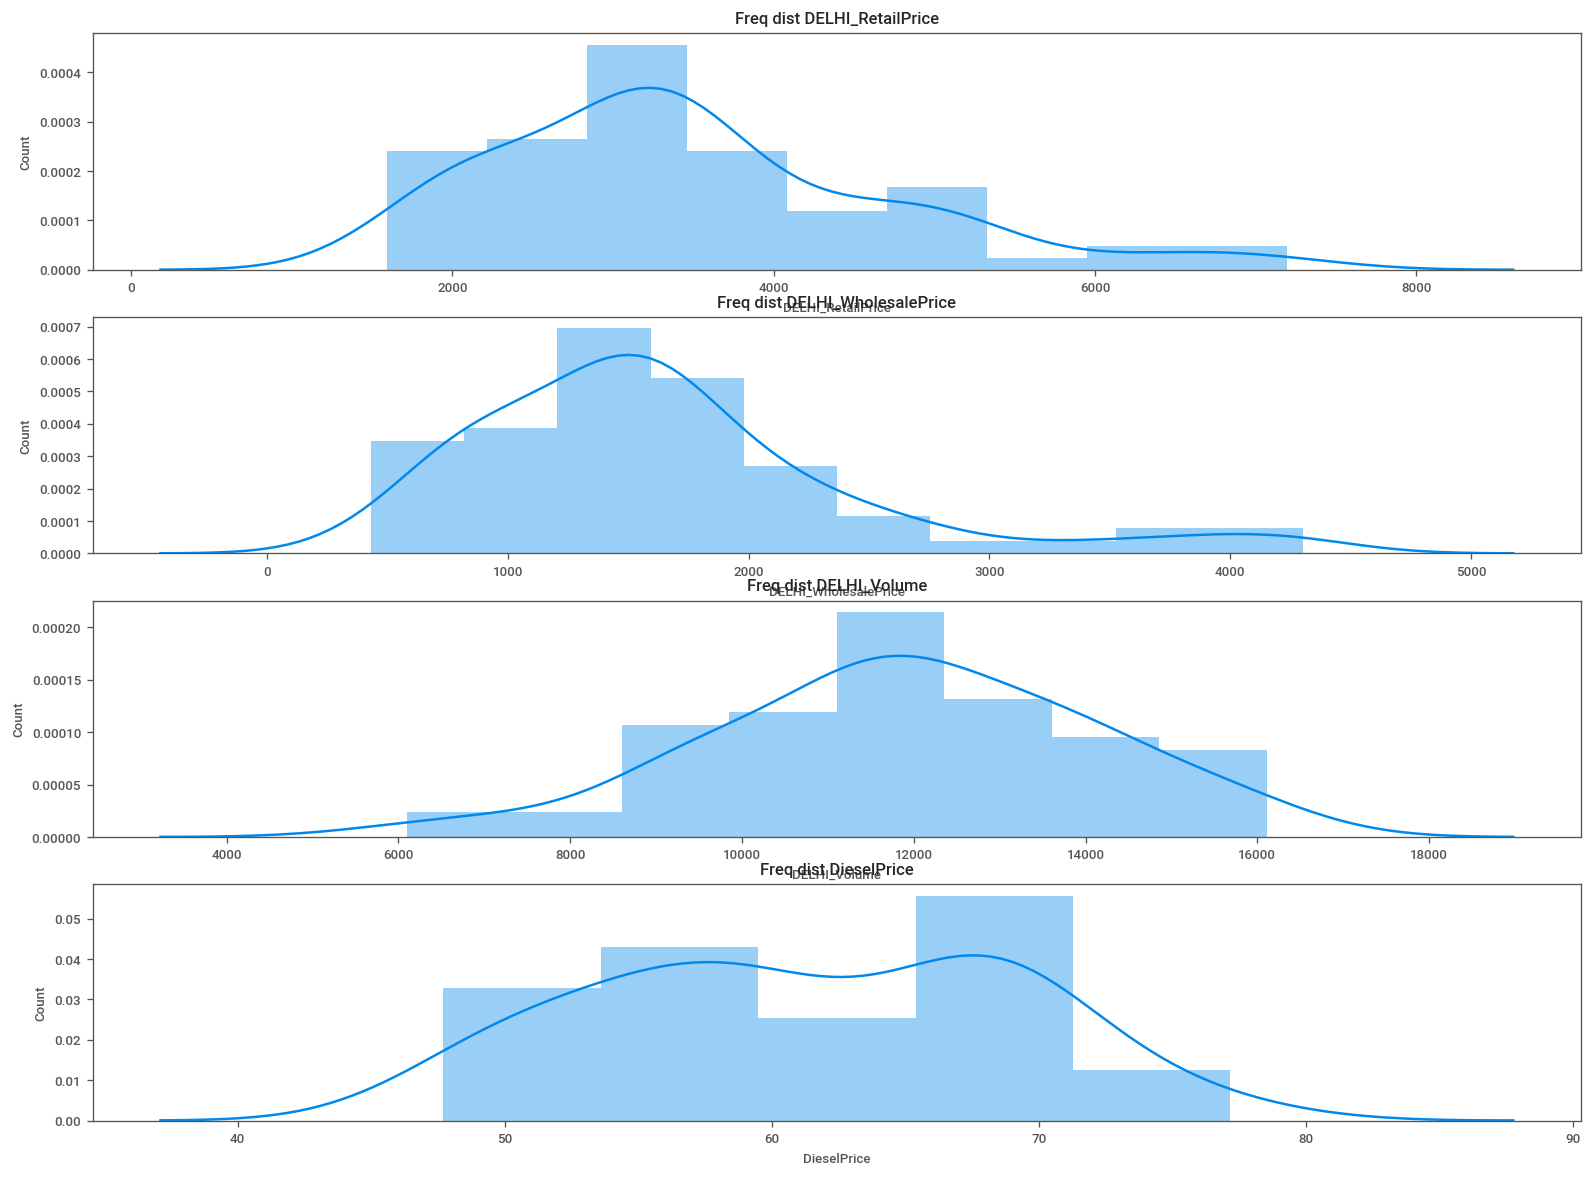

In [ ]:
columns=['DELHI_RetailPrice','DELHI_WholesalePrice','DELHI_Volume','DieselPrice']
fig,ax=plt.subplots(len(columns),figsize=(16,12))

for i, col_val in enumerate (columns):
  
  sns.distplot(Del[col_val],hist=True, ax=ax[i])
  ax[i].set_title('Freq dist '+col_val,fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel('Count', fontsize=8)

plt.show()

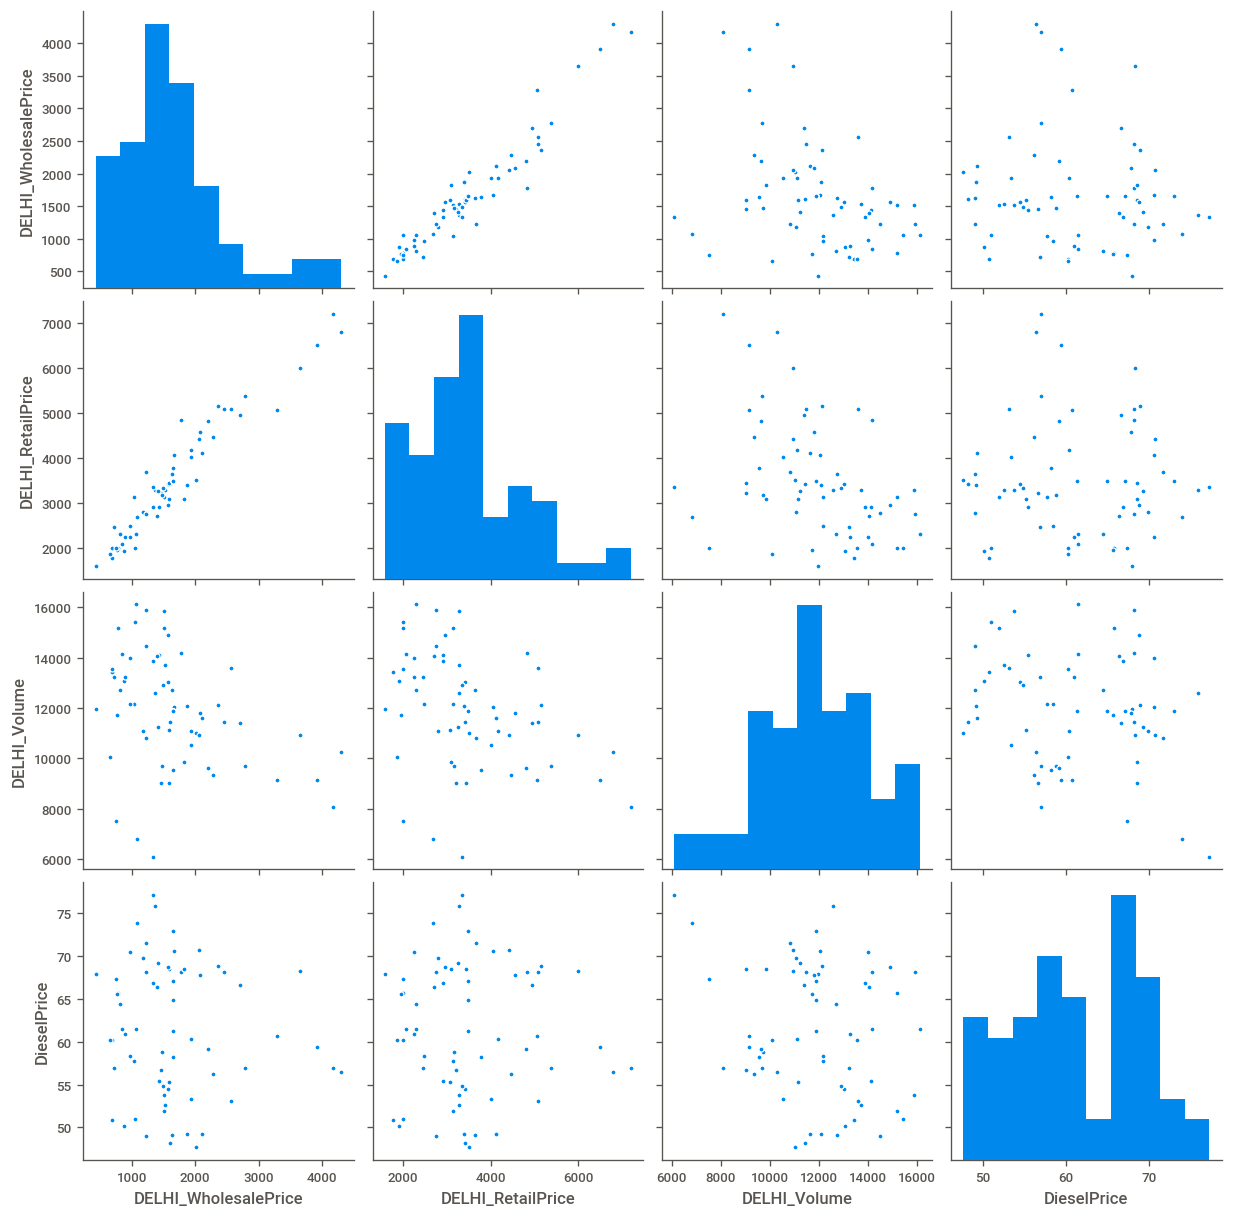

In [ ]:
Del_data_hist = Del
sns.pairplot(Del_data_hist )

# Outlier detection analysis

In [ ]:
col1=['DELHI_RetailPrice']
col2=['DELHI_WholesalePrice']
col3=['DELHI_Volume']
col4=['DieselPrice']

# Correlation matrix

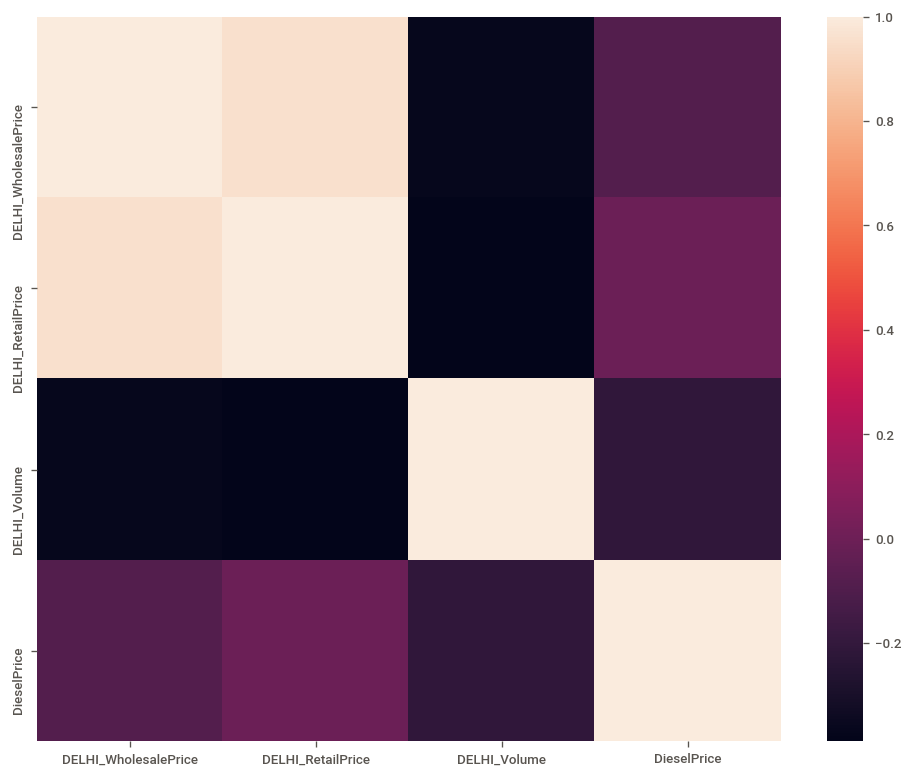

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = Del.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Analysis using line plots


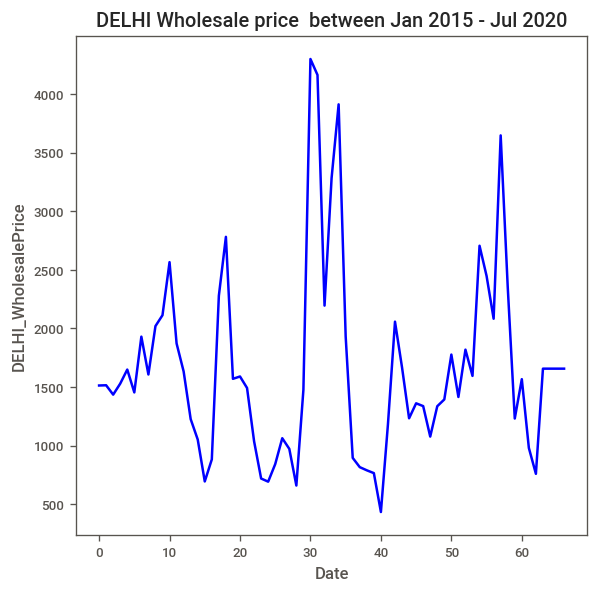

In [ ]:
plt.figure(figsize=(5.5, 5.5))
Del['DELHI_WholesalePrice'].plot(color='b')
plt.title('DELHI Wholesale price  between Jan 2015 - Jul 2020')
plt.xlabel('Date')
plt.ylabel('DELHI_WholesalePrice')
plt.savefig('D07887_01.png', format='png', dpi=300)

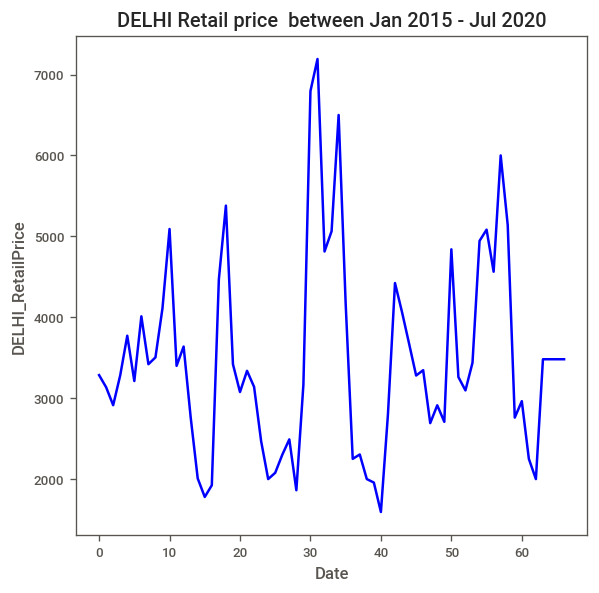

In [ ]:
plt.figure(figsize=(5.5, 5.5))
Del['DELHI_RetailPrice'].plot(color='b')
plt.title('DELHI Retail price  between Jan 2015 - Jul 2020')
plt.xlabel('Date')
plt.ylabel('DELHI_RetailPrice')
plt.savefig('D07887_01.png', format='png', dpi=300)

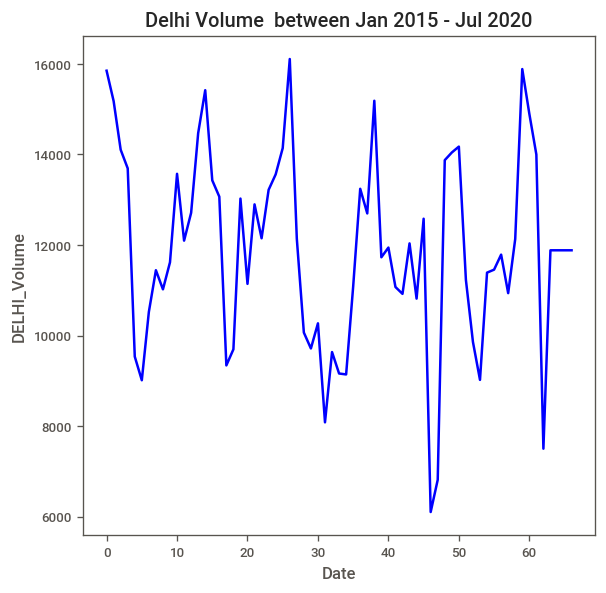

In [ ]:
plt.figure(figsize=(5.5, 5.5))
Del['DELHI_Volume'].plot(color='b')
plt.title('Delhi Volume  between Jan 2015 - Jul 2020')
plt.xlabel('Date')
plt.ylabel('DELHI_Volume')
plt.savefig('D07887_01_16.png', format='png', dpi=300)

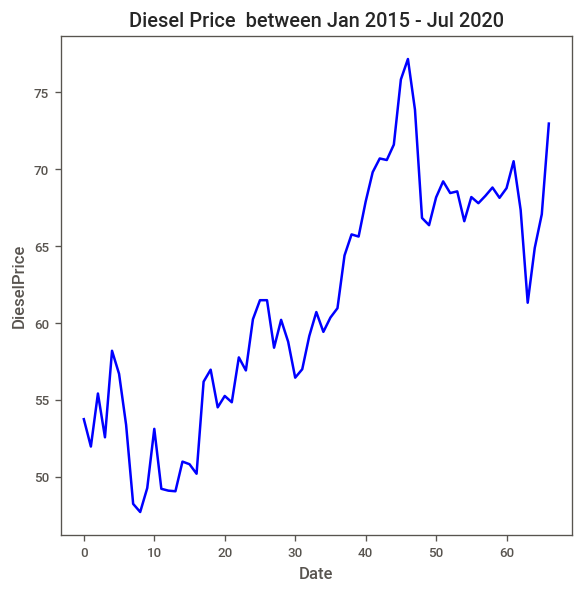

In [ ]:
plt.figure(figsize=(5.5, 5.5))
Del['DieselPrice'].plot(color='b')
plt.title('Diesel Price  between Jan 2015 - Jul 2020')
plt.xlabel('Date')
plt.ylabel('DieselPrice')
plt.savefig('D07887_01_17.png', format='png', dpi=300)

# Dickey fuller test to check p value and stationality

In [ ]:
#Run ADF test on the original time series
adf_result = stattools.adfuller(Del['DELHI_RetailPrice'], autolag='AIC')

In [ ]:
print('p-val of the ADF test on irregular variations in Retail Price:', adf_result[1])

p-val of the ADF test on irregular variations in Retail Price: 3.366977291419081e-05


In [ ]:
print('ADF Statistic: %f' % adf_result[0])

ADF Statistic: -4.907838


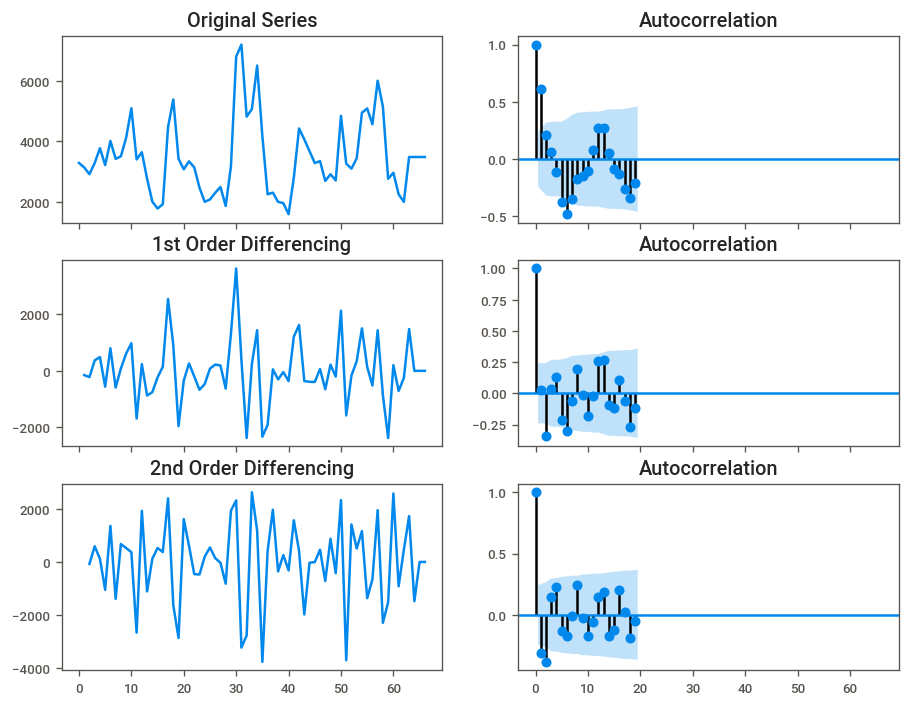

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(Del.DELHI_RetailPrice); axes[0, 0].set_title('Original Series')
plot_acf(Del.DELHI_RetailPrice, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(Del.DELHI_RetailPrice.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(Del.DELHI_RetailPrice.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(Del.DELHI_RetailPrice.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(Del.DELHI_RetailPrice.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

# Box Plot analysis for Outliers

Text(0.5, 1.0, 'Box plot of Delhi Retail price')

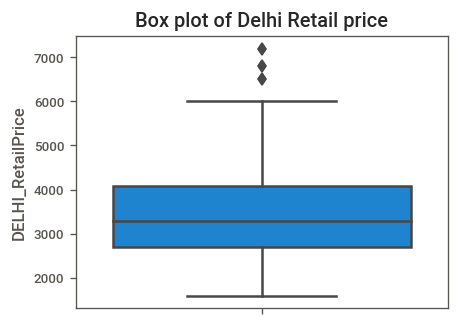

In [ ]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(4, 3))
g = sns.boxplot(Del['DELHI_RetailPrice'],orient='v')
g.set_title('Box plot of Delhi Retail price')

Text(0.5, 1.0, 'Box plot of Delhi Volume')

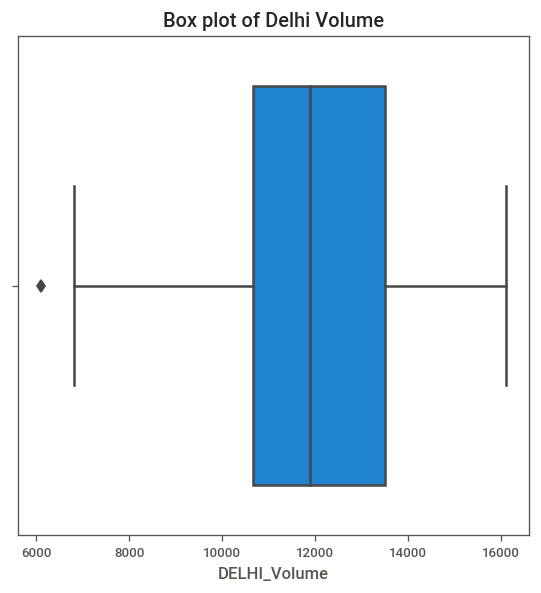

In [ ]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(Del['DELHI_Volume'])
g.set_title('Box plot of Delhi Volume')

Text(0.5, 1.0, 'Box plot of Delhi WholesalePrice')

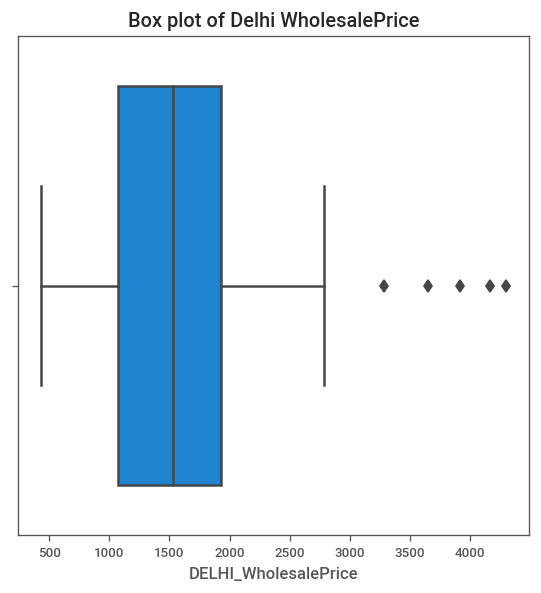

In [ ]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(Del['DELHI_WholesalePrice'])
g.set_title('Box plot of Delhi WholesalePrice')

Text(0.5, 1.0, 'Box plot of DieselPrice')

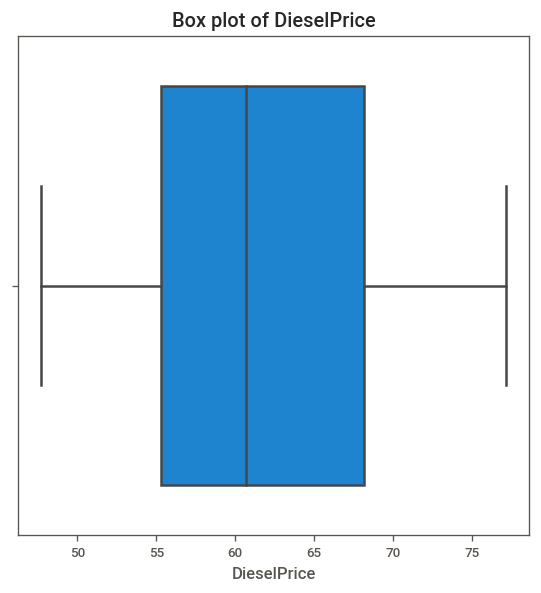

In [ ]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(Del['DieselPrice'])
g.set_title('Box plot of DieselPrice')

# There is a linear relationship between Wholesale and retail price from EDA, we decided to drop wholesale price from the final data for Modeling

In [ ]:
col=['Date','DELHI_RetailPrice','DELHI_Volume','DieselPrice']
DelPrice = Del[col]

In [ ]:
DelPrice.to_excel('DelhiTomato_31Aug.xlsx')

# Auto EDA using SweetViz and Pandas Profiling

In [ ]:
pip install sweetviz

In [ ]:
# importing sweetviz
import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze(DelPrice)
#display the report
advert_report.show_html('DelhiTomato.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report DelhiTomato.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
pip install pandas-profiling==2.7.1

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(DelPrice)

display(profile)

In [ ]:
profile.to_file("DelhiTomatoEDA.html")

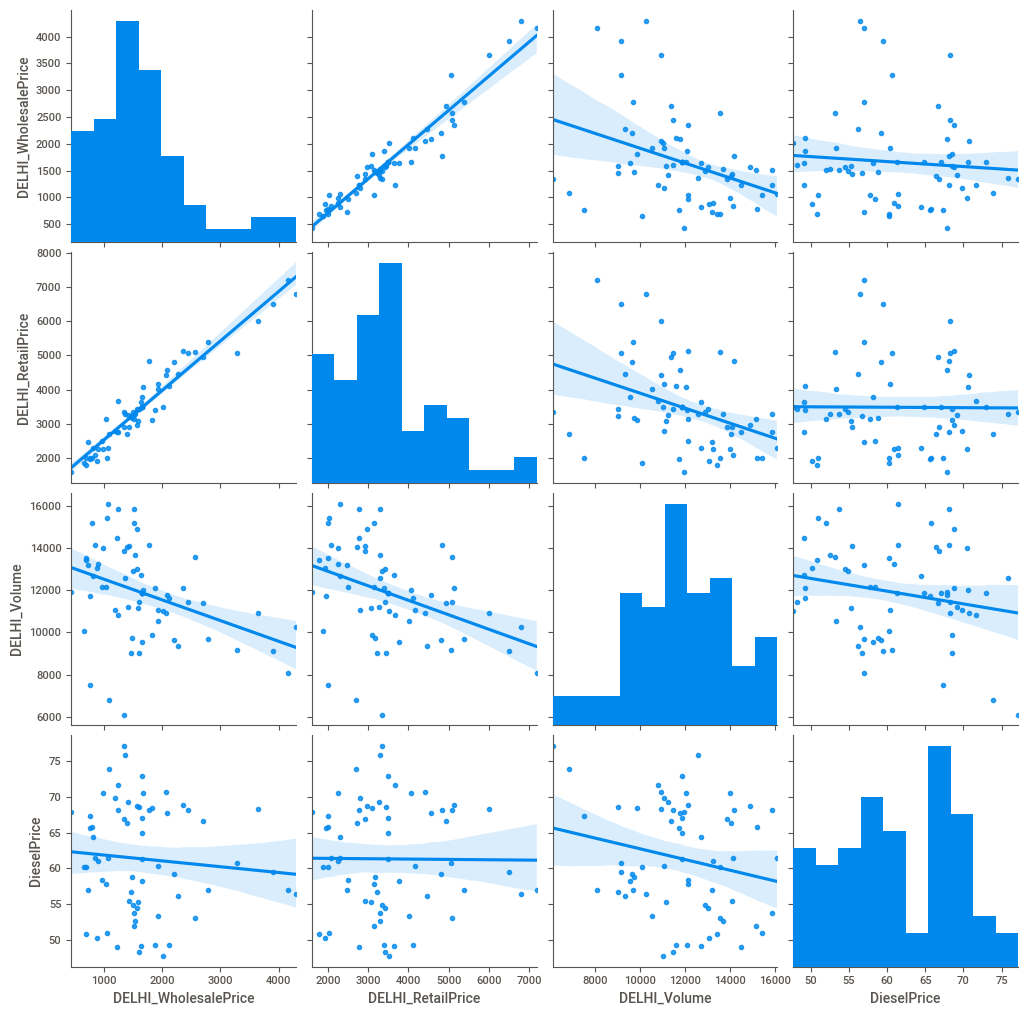

In [ ]:
#pair plot
import seaborn as sns
sns.pairplot(Del,kind="reg")
plt.show();